In [1]:
import xarray as xr
import salem
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ds = salem.open_xr_dataset('oisst-avhrr-v02r01.20210901.nc')
ds.coords['lon'] = ((ds.coords['lon'] + 180) % 360) - 180
ds = ds.sortby(ds.lon)
ds

<xarray.Dataset>
Dimensions:  (time: 1, zlev: 1, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 2021-09-01T12:00:00
  * zlev     (zlev) float32 0.0
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    sst      (time, zlev, lat, lon) float32 ...
    anom     (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    ice      (time, zlev, lat, lon) float32 ...
Attributes: (12/38)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20210901.nc
    naming_authority:           gov.noaa.ncei
    ...                         ...
    time_coverage_end:          2021-09-01T23:59:59Z
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR
    pyproj_srs:                 +proj=longlat +datum=WGS84 +no_defs

In [3]:
ds.coords['time'].data

array(['2021-09-01T12:00:00.000000000'], dtype='datetime64[ns]')

In [4]:
ds_12 = ds.salem.subset(corners=((-90, 0), (-80, -10)))
ds_12

<xarray.Dataset>
Dimensions:  (time: 1, zlev: 1, lat: 41, lon: 41)
Coordinates:
  * time     (time) datetime64[ns] 2021-09-01T12:00:00
  * zlev     (zlev) float32 0.0
  * lat      (lat) float32 -9.875 -9.625 -9.375 -9.125 ... -0.375 -0.125 0.125
  * lon      (lon) float32 -89.88 -89.62 -89.38 -89.12 ... -80.38 -80.12 -79.88
Data variables:
    sst      (time, zlev, lat, lon) float32 ...
    anom     (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    ice      (time, zlev, lat, lon) float32 ...
Attributes: (12/38)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20210901.nc
    naming_authority:           gov.noaa.ncei
    ...                         ...
    time_coverage_end:          2021-09-01T23:59:59Z
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR
    pyproj_srs:                 +proj=longlat +datum=WGS84 +no_defs

In [5]:
ds_12.lat.values

array([-9.875, -9.625, -9.375, -9.125, -8.875, -8.625, -8.375, -8.125,
       -7.875, -7.625, -7.375, -7.125, -6.875, -6.625, -6.375, -6.125,
       -5.875, -5.625, -5.375, -5.125, -4.875, -4.625, -4.375, -4.125,
       -3.875, -3.625, -3.375, -3.125, -2.875, -2.625, -2.375, -2.125,
       -1.875, -1.625, -1.375, -1.125, -0.875, -0.625, -0.375, -0.125,
        0.125], dtype=float32)

In [6]:
ds_12.lon.values

array([-89.875, -89.625, -89.375, -89.125, -88.875, -88.625, -88.375,
       -88.125, -87.875, -87.625, -87.375, -87.125, -86.875, -86.625,
       -86.375, -86.125, -85.875, -85.625, -85.375, -85.125, -84.875,
       -84.625, -84.375, -84.125, -83.875, -83.625, -83.375, -83.125,
       -82.875, -82.625, -82.375, -82.125, -81.875, -81.625, -81.375,
       -81.125, -80.875, -80.625, -80.375, -80.125, -79.875],
      dtype=float32)

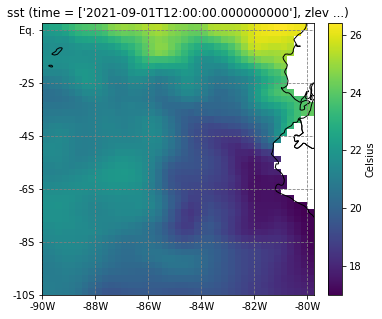

In [7]:
fig = plt.figure(figsize=(15, 5))
ds_12.sst.salem.quick_map()

In [8]:
ds_34 = ds.salem.subset(corners=((-170, 5), (-120, -5)))
ds_34

<xarray.Dataset>
Dimensions:  (time: 1, zlev: 1, lat: 41, lon: 201)
Coordinates:
  * time     (time) datetime64[ns] 2021-09-01T12:00:00
  * zlev     (zlev) float32 0.0
  * lat      (lat) float32 -4.875 -4.625 -4.375 -4.125 ... 4.625 4.875 5.125
  * lon      (lon) float32 -169.9 -169.6 -169.4 -169.1 ... -120.4 -120.1 -119.9
Data variables:
    sst      (time, zlev, lat, lon) float32 ...
    anom     (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    ice      (time, zlev, lat, lon) float32 ...
Attributes: (12/38)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20210901.nc
    naming_authority:           gov.noaa.ncei
    ...                         ...
    time_coverage_end:          2021-09-01T23:59:59Z
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR
    pyproj_srs:                 +proj=longlat +datum=WGS84 +no_defs

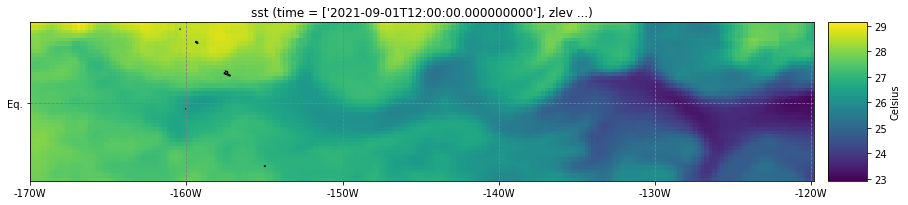

In [9]:
fig = plt.figure(figsize=(15, 5))
ds_34.sst.salem.quick_map()

In [10]:
data_temp_12 = pd.DataFrame()

In [11]:
for x in range(0, len(ds_12.data_vars['sst'][0][0])):    
    data_temp_12['{}'.format(x)] = pd.DataFrame(ds_12.data_vars['sst'][0][0][x].values)

In [12]:
data_temp_12 = data_temp_12.set_index(ds_12.lon.values)
data_temp_12.columns = ds_12.lat.values
data_temp_12

,-9.875,-9.625,-9.375,-9.125,-8.875,-8.625,-8.375,-8.125,-7.875,-7.625,...,-2.125,-1.875,-1.625,-1.375,-1.125,-0.875,-0.625,-0.375,-0.125,0.125
-89.875,21.049999,21.049999,21.000000,20.959999,20.969999,21.020000,21.119999,21.240000,21.410000,21.529999,...,20.680000,20.949999,21.379999,21.680000,21.719999,21.660000,21.600000,21.719999,21.949999,22.379999
-89.625,20.990000,21.000000,20.980000,20.969999,21.000000,21.059999,21.180000,21.289999,21.449999,21.559999,...,20.779999,21.039999,21.359999,21.670000,21.750000,21.750000,21.660000,21.750000,22.090000,22.580000
-89.375,20.939999,20.969999,20.980000,21.010000,21.090000,21.170000,21.289999,21.389999,21.529999,21.609999,...,20.879999,21.100000,21.369999,21.619999,21.709999,21.660000,21.619999,21.830000,22.170000,22.660000
-89.125,20.879999,20.930000,20.990000,21.059999,21.160000,21.260000,21.379999,21.469999,21.520000,21.559999,...,21.090000,21.289999,21.459999,21.650000,21.740000,21.660000,21.660000,21.820000,22.359999,23.080000
-88.875,20.760000,20.820000,20.920000,21.029999,21.150000,21.260000,21.379999,21.480000,21.529999,21.570000,...,21.299999,21.500000,21.699999,21.809999,21.760000,21.709999,21.770000,22.119999,22.760000,23.330000
-88.625,20.590000,20.689999,20.820000,20.959999,21.070000,21.199999,21.330000,21.420000,21.480000,21.529999,...,21.520000,21.770000,21.939999,21.889999,21.789999,21.770000,21.889999,22.400000,23.080000,23.670000
-88.375,20.350000,20.490000,20.660000,20.820000,20.969999,21.109999,21.230000,21.320000,21.400000,21.520000,...,21.719999,21.980000,21.980000,21.900000,21.760000,21.709999,21.959999,22.480000,23.160000,23.760000
-88.125,20.070000,20.260000,20.469999,20.670000,20.850000,20.990000,21.100000,21.199999,21.279999,21.430000,...,21.760000,21.910000,21.920000,21.859999,21.750000,21.719999,21.969999,22.539999,23.209999,23.830000
-87.875,19.779999,20.000000,20.250000,20.480000,20.689999,20.840000,20.949999,21.049999,21.150000,21.330000,...,21.660000,21.689999,21.660000,21.680000,21.740000,21.770000,22.090000,22.670000,23.330000,23.969999
-87.625,19.580000,19.830000,20.090000,20.330000,20.529999,20.670000,20.770000,20.879999,20.990000,21.209999,...,21.320000,21.400000,21.410000,21.529999,21.639999,21.809999,22.160000,22.769999,23.500000,24.199999


In [13]:
data_temp_12.to_csv('data_temp_12.csv')

In [14]:
data_temp_34 = pd.DataFrame()

for x in range(0, len(ds_34.data_vars['sst'][0][0])):    
    data_temp_34['{}'.format(x)] = pd.DataFrame(ds_34.data_vars['sst'][0][0][x].values)


In [15]:
data_temp_34 = data_temp_34.set_index(ds_34.lon.values)
data_temp_34.columns = ds_34.lat.values
data_temp_34

,-4.875,-4.625,-4.375,-4.125,-3.875,-3.625,-3.375,-3.125,-2.875,-2.625,...,2.875,3.125,3.375,3.625,3.875,4.125,4.375,4.625,4.875,5.125
-169.875,27.799999,27.869999,27.869999,27.879999,27.879999,27.889999,27.900000,27.930000,27.980000,27.990000,...,27.559999,27.670000,27.809999,27.910000,27.949999,27.959999,28.090000,28.299999,28.650000,28.830000
-169.625,27.820000,27.859999,27.889999,27.889999,27.879999,27.900000,27.910000,27.949999,28.010000,28.029999,...,27.549999,27.680000,27.900000,27.990000,28.010000,28.010000,28.059999,28.250000,28.599998,28.830000
-169.375,27.789999,27.830000,27.859999,27.889999,27.889999,27.849998,27.900000,27.949999,27.980000,28.029999,...,27.519999,27.670000,27.889999,27.939999,27.980000,27.969999,27.980000,28.160000,28.500000,28.760000
-169.125,27.750000,27.769999,27.809999,27.840000,27.859999,27.849998,27.859999,27.889999,27.939999,28.000000,...,27.529999,27.629999,27.740000,27.840000,27.879999,27.930000,27.939999,28.059999,28.369999,28.650000
-168.875,27.689999,27.680000,27.730000,27.760000,27.789999,27.809999,27.820000,27.849998,27.900000,27.949999,...,27.539999,27.500000,27.609999,27.689999,27.789999,27.889999,27.900000,27.969999,28.240000,28.529999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-120.875,24.969999,24.869999,24.709999,24.580000,24.529999,24.570000,24.639999,24.680000,24.609999,24.469999,...,26.779999,27.070000,27.170000,27.129999,27.150000,27.299999,27.480000,27.599998,27.650000,27.680000
-120.625,24.820000,24.699999,24.559999,24.500000,24.510000,24.570000,24.629999,24.639999,24.570000,24.449999,...,26.820000,27.139999,27.209999,27.139999,27.109999,27.209999,27.359999,27.469999,27.529999,27.580000
-120.375,24.609999,24.469999,24.410000,24.439999,24.500000,24.580000,24.619999,24.609999,24.529999,24.410000,...,26.830000,27.180000,27.260000,27.160000,27.090000,27.109999,27.189999,27.299999,27.389999,27.449999
-120.125,24.389999,24.299999,24.340000,24.410000,24.490000,24.580000,24.609999,24.580000,24.480000,24.369999,...,26.719999,27.109999,27.240000,27.150000,27.029999,26.949999,26.949999,27.049999,27.099998,27.180000


In [16]:
data_temp_34.to_csv('data_temp_34.csv')

In [17]:
ds_bm = ds.salem.subset(corners=((-70, -35), (-45, -60)))

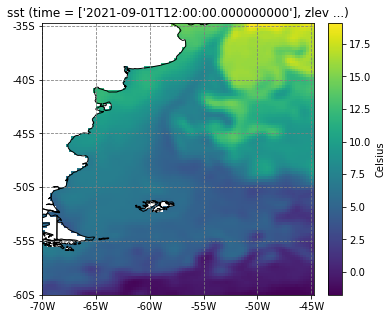

In [18]:
fig = plt.figure(figsize=(15, 5))
ds_bm.sst.salem.quick_map()

In [19]:
data_temp_bm = pd.DataFrame()

for x in range(0, len(ds_bm.data_vars['sst'][0][0])):    
    data_temp_bm['{}'.format(x)] = pd.DataFrame(ds_bm.data_vars['sst'][0][0][x].values)


C:\ProgramData\Anaconda3\envs\Python37\lib\site-packages\ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


In [20]:
data_temp_bm = data_temp_bm.set_index(ds_bm.lon.values)
data_temp_bm.columns = ds_bm.lat.values
data_temp_bm

,-59.875,-59.625,-59.375,-59.125,-58.875,-58.625,-58.375,-58.125,-57.875,-57.625,...,-37.125,-36.875,-36.625,-36.375,-36.125,-35.875,-35.625,-35.375,-35.125,-34.875
-69.875,2.40,2.50,2.55,2.96,3.79,4.65,5.09,5.16,5.04,5.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-69.625,2.63,2.59,2.41,2.62,3.39,4.40,5.00,5.11,4.95,5.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-69.375,2.93,2.80,2.45,2.38,3.18,4.19,4.82,4.95,4.86,4.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-69.125,3.17,2.93,2.47,2.34,2.90,3.89,4.60,4.81,4.76,4.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-68.875,3.29,2.94,2.49,2.42,2.95,3.90,4.43,4.68,4.65,4.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-45.875,-1.65,-1.57,-1.34,-1.01,-0.64,-0.34,-0.13,0.06,0.16,0.24,...,14.040000,14.960000,15.540000,16.180000,16.799999,17.150000,17.299999,17.580000,17.930000,18.059999
-45.625,-1.59,-1.49,-1.29,-1.04,-0.75,-0.49,-0.25,-0.06,0.10,0.21,...,14.230000,14.849999,15.570000,16.260000,16.740000,16.990000,17.129999,17.539999,18.059999,18.299999
-45.375,-1.53,-1.42,-1.25,-1.03,-0.84,-0.60,-0.36,-0.15,0.01,0.12,...,15.270000,15.589999,16.109999,16.570000,16.859999,16.940001,17.029999,17.440001,18.070000,18.400000
-45.125,-1.49,-1.38,-1.19,-1.00,-0.85,-0.64,-0.45,-0.22,-0.08,0.01,...,16.379999,16.480000,16.639999,16.830000,16.910000,16.889999,16.959999,17.379999,17.969999,18.379999


In [21]:
data_temp_bm.to_csv('data_temp_bm.csv')